In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

print("Starting Financial Forecasting EDA")

Starting Financial Forecasting EDA


# Download All Data (Run sekali aja)

In [ ]:
# Indonesian stocks symbols
STOCKS = {
    '^JKSE': 'IDX Composite',
    'BBCA.JK': 'Bank Central Asia',
    'BBRI.JK': 'Bank Rakyat Indonesia', 
    'TLKM.JK': 'Telkom Indonesia',
    'ASII.JK': 'Astra International',
    'UNVR.JK': 'Unilever Indonesia'
}

# Download all data
print("📊 Downloading stock data...")
stock_data = {}
for symbol, name in STOCKS.items():
    try:
        data = yf.download(symbol, start="2020-01-01", end="2024-12-31", progress=False)
        if not data.empty: # type: ignore
            stock_data[symbol] = data
            print(f"✅ {symbol} ({name}): {len(data)} records") # type: ignore
        else:
            print(f"❌ {symbol}: No data found")
    except Exception as e:
        print(f"❌ {symbol}: Error - {e}")

print(f"\nSuccessfully downloaded {len(stock_data)} stocks!")

📊 Downloading stock data...
✅ ^JKSE (IDX Composite): 1211 records
✅ BBCA.JK (Bank Central Asia): 1211 records
✅ BBRI.JK (Bank Rakyat Indonesia): 1211 records
✅ TLKM.JK (Telkom Indonesia): 1211 records
✅ ASII.JK (Astra International): 1211 records
✅ UNVR.JK (Unilever Indonesia): 1211 records

Successfully downloaded 6 stocks!


# Data Understanding & Quality Check

In [4]:
def analyze_data_quality(stock_data):
   """Comprehensive data quality analysis"""
   
   print("=" * 60)
   print("                 DATA QUALITY REPORT")
   print("=" * 60)
   
   summary_stats = []
   
   for symbol, data in stock_data.items():
       # Basic info
       missing_values = data.isnull().sum().sum()
       date_range = f"{data.index[0].date()} to {data.index[-1].date()}"
       
       # Handle potential NaN values in price calculations
       try:
           close_min = data['Close'].min()
           close_max = data['Close'].max()
           
           # Extract scalar value from Series if needed
           if hasattr(close_min, 'iloc'):
               close_min = close_min.iloc[0]
               close_max = close_max.iloc[0]
           
           price_range = f"{close_min:.2f} - {close_max:.2f}"
       except:
           price_range = "N/A"
       
       # Handle potential NaN values in volume
       try:
           volume_mean = data['Volume'].mean()
           
           # Extract scalar value from Series if needed
           if hasattr(volume_mean, 'iloc'):
               volume_mean = volume_mean.iloc[0]
               
           avg_volume = f"{volume_mean:,.0f}"
       except:
           avg_volume = "N/A"
       
       # Quality issues - Convert to int explicitly
       try:
           zero_volume = int((data['Volume'] == 0).sum())
       except:
           zero_volume = 0
       
       try:
           # Split the price anomalies calculation and convert to int
           high_low_issues = int((data['High'] < data['Low']).sum())
           negative_close = int((data['Close'] <= 0).sum())
           price_anomalies = high_low_issues + negative_close
       except:
           price_anomalies = 0
       
       summary_stats.append({
           'Symbol': symbol,
           'Records': len(data),
           'Missing_Values': missing_values,
           'Date_Range': date_range,
           'Price_Range_IDR': price_range,
           'Avg_Volume': avg_volume,
           'Zero_Volume_Days': zero_volume,
           'Price_Anomalies': price_anomalies
       })
       
       print(f"\n📈 {STOCKS[symbol]} ({symbol})")
       print(f"   Records: {len(data):,}")
       print(f"   Missing Values: {missing_values}")
       print(f"   Date Range: {date_range}")
       print(f"   Price Range: IDR {price_range}")
       print(f"   Avg Volume: {avg_volume}")
       print(f"   Quality Issues: {zero_volume + price_anomalies}")
   
   return pd.DataFrame(summary_stats)

In [5]:
quality_report = analyze_data_quality(stock_data)

                 DATA QUALITY REPORT

📈 IDX Composite (^JKSE)
   Records: 1,211
   Missing Values: 0
   Date Range: 2020-01-02 to 2024-12-30
   Price Range: IDR 3937.63 - 7905.39
   Avg Volume: 162,164,986
   Quality Issues: 6

📈 Bank Central Asia (BBCA.JK)
   Records: 1,211
   Missing Values: 0
   Date Range: 2020-01-02 to 2024-12-30
   Price Range: IDR 3854.52 - 10570.41
   Avg Volume: 87,886,293
   Quality Issues: 2

📈 Bank Rakyat Indonesia (BBRI.JK)
   Records: 1,211
   Missing Values: 0
   Date Range: 2020-01-02 to 2024-12-30
   Price Range: IDR 1513.76 - 5763.10
   Avg Volume: 184,215,141
   Quality Issues: 0

📈 Telkom Indonesia (TLKM.JK)
   Records: 1,211
   Missing Values: 0
   Date Range: 2020-01-02 to 2024-12-30
   Price Range: IDR 1919.47 - 3982.06
   Avg Volume: 116,940,612
   Quality Issues: 1

📈 Astra International (ASII.JK)
   Records: 1,211
   Missing Values: 0
   Date Range: 2020-01-02 to 2024-12-30
   Price Range: IDR 2251.15 - 5738.72
   Avg Volume: 51,077,805
   Qua

In [6]:
print("\nSummary Table:")
print(quality_report.to_string(index=False))


Summary Table:
 Symbol  Records  Missing_Values               Date_Range    Price_Range_IDR  Avg_Volume  Zero_Volume_Days  Price_Anomalies
  ^JKSE     1211               0 2020-01-02 to 2024-12-30  3937.63 - 7905.39 162,164,986                 6                0
BBCA.JK     1211               0 2020-01-02 to 2024-12-30 3854.52 - 10570.41  87,886,293                 2                0
BBRI.JK     1211               0 2020-01-02 to 2024-12-30  1513.76 - 5763.10 184,215,141                 0                0
TLKM.JK     1211               0 2020-01-02 to 2024-12-30  1919.47 - 3982.06 116,940,612                 1                0
ASII.JK     1211               0 2020-01-02 to 2024-12-30  2251.15 - 5738.72  51,077,805                 1                0
UNVR.JK     1211               0 2020-01-02 to 2024-12-30  1646.61 - 7014.84  19,576,742                 2                0


# Data Preprocessing

In [7]:
def preprocess_stock_data(data):
    """Clean and preprocess stock data"""
    
    # Make a copy
    df = data.copy()
    
    # 1. Handle missing values (forward fill max 3 days)
    df = df.fillna(method='ffill', limit=3)
    df = df.dropna()
    
    # 2. Fix price inconsistencies - Fixed version
    try:
        anomaly_mask = df['High'] < df['Low']
        if anomaly_mask.any():
            df.loc[anomaly_mask, ['High', 'Low']] = df.loc[anomaly_mask, ['Low', 'High']]
    except:
        print("   Warning: Could not fix price inconsistencies")
    
    # 3. Remove zero volume days
    try:
        df = df[df['Volume'] > 0]
    except:
        print("   Warning: Could not filter zero volume days")
    
    # 4. Add derived features
    df['Returns'] = df['Close'].pct_change()
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Volatility'] = df['Returns'].rolling(20).std()
    df['Price_Change'] = df['Close'] - df['Open']
    df['High_Low_Spread'] = df['High'] - df['Low']
    df['Volume_MA'] = df['Volume'].rolling(20).mean()
    
    # 5. Technical indicators
    # Simple Moving Averages
    df['SMA_10'] = df['Close'].rolling(10).mean()
    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()
    
    # RSI
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    return df

In [8]:
# Apply preprocessing to all stocks
processed_data = {}
print("Preprocessing stock data...")
for symbol, data in stock_data.items():
    processed_data[symbol] = preprocess_stock_data(data)
    print(f"✅ {symbol}: {len(processed_data[symbol])} clean records")

Preprocessing stock data...
✅ ^JKSE: 1211 clean records
✅ BBCA.JK: 1211 clean records
✅ BBRI.JK: 1211 clean records
✅ TLKM.JK: 1211 clean records
✅ ASII.JK: 1211 clean records
✅ UNVR.JK: 1211 clean records


# EDA - Price Trends Visualization

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Setup paths
REPORTS_PATH = '../reports'
FIGURES_PATH = '../reports/figures'

os.makedirs(FIGURES_PATH, exist_ok=True)

In [11]:
def plot_price_trends(processed_data):
    """Plot price trends for all stocks - FIXED VERSION"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, (symbol, data) in enumerate(processed_data.items()):
        ax = axes[idx]
        
        if isinstance(data.columns, pd.MultiIndex):
            close_col = [col for col in data.columns if 'Close' in str(col)][0]
            sma20_col = [col for col in data.columns if 'SMA_20' in str(col)][0] 
            sma50_col = [col for col in data.columns if 'SMA_50' in str(col)][0]
            
            close_data = data[close_col]
            sma20_data = data[sma20_col]
            sma50_data = data[sma50_col]
        else:
            close_data = data['Close']
            sma20_data = data['SMA_20'] 
            sma50_data = data['SMA_50']
        
        # Plot data
        ax.plot(data.index, close_data, linewidth=1.5, color='blue', alpha=0.8, label='Close')
        ax.plot(data.index, sma20_data, linewidth=1, color='red', alpha=0.7, label='SMA 20')
        ax.plot(data.index, sma50_data, linewidth=1, color='green', alpha=0.7, label='SMA 50')
        
        ax.set_title(f'{STOCKS[symbol]}\n({symbol})', fontsize=12, fontweight='bold')
        ax.set_ylabel('Price (IDR)')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        
        # FIX: Handle latest price extraction
        latest_price = close_data.dropna().iloc[-1]
        ax.text(0.02, 0.98, f'Latest: IDR {latest_price:,.0f}', 
                transform=ax.transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    plt.tight_layout()
    plt.suptitle('Indonesian Stock Price Trends (2020-2024)', fontsize=16, y=1.02)
    
    # FIX: Save dengan path yang benar SEBELUM plt.show()
    save_path = os.path.join(FIGURES_PATH, 'price_trends.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Price trends saved to: {save_path}")
    
    plt.show()

✅ Price trends saved to: ../reports/figures\price_trends.png


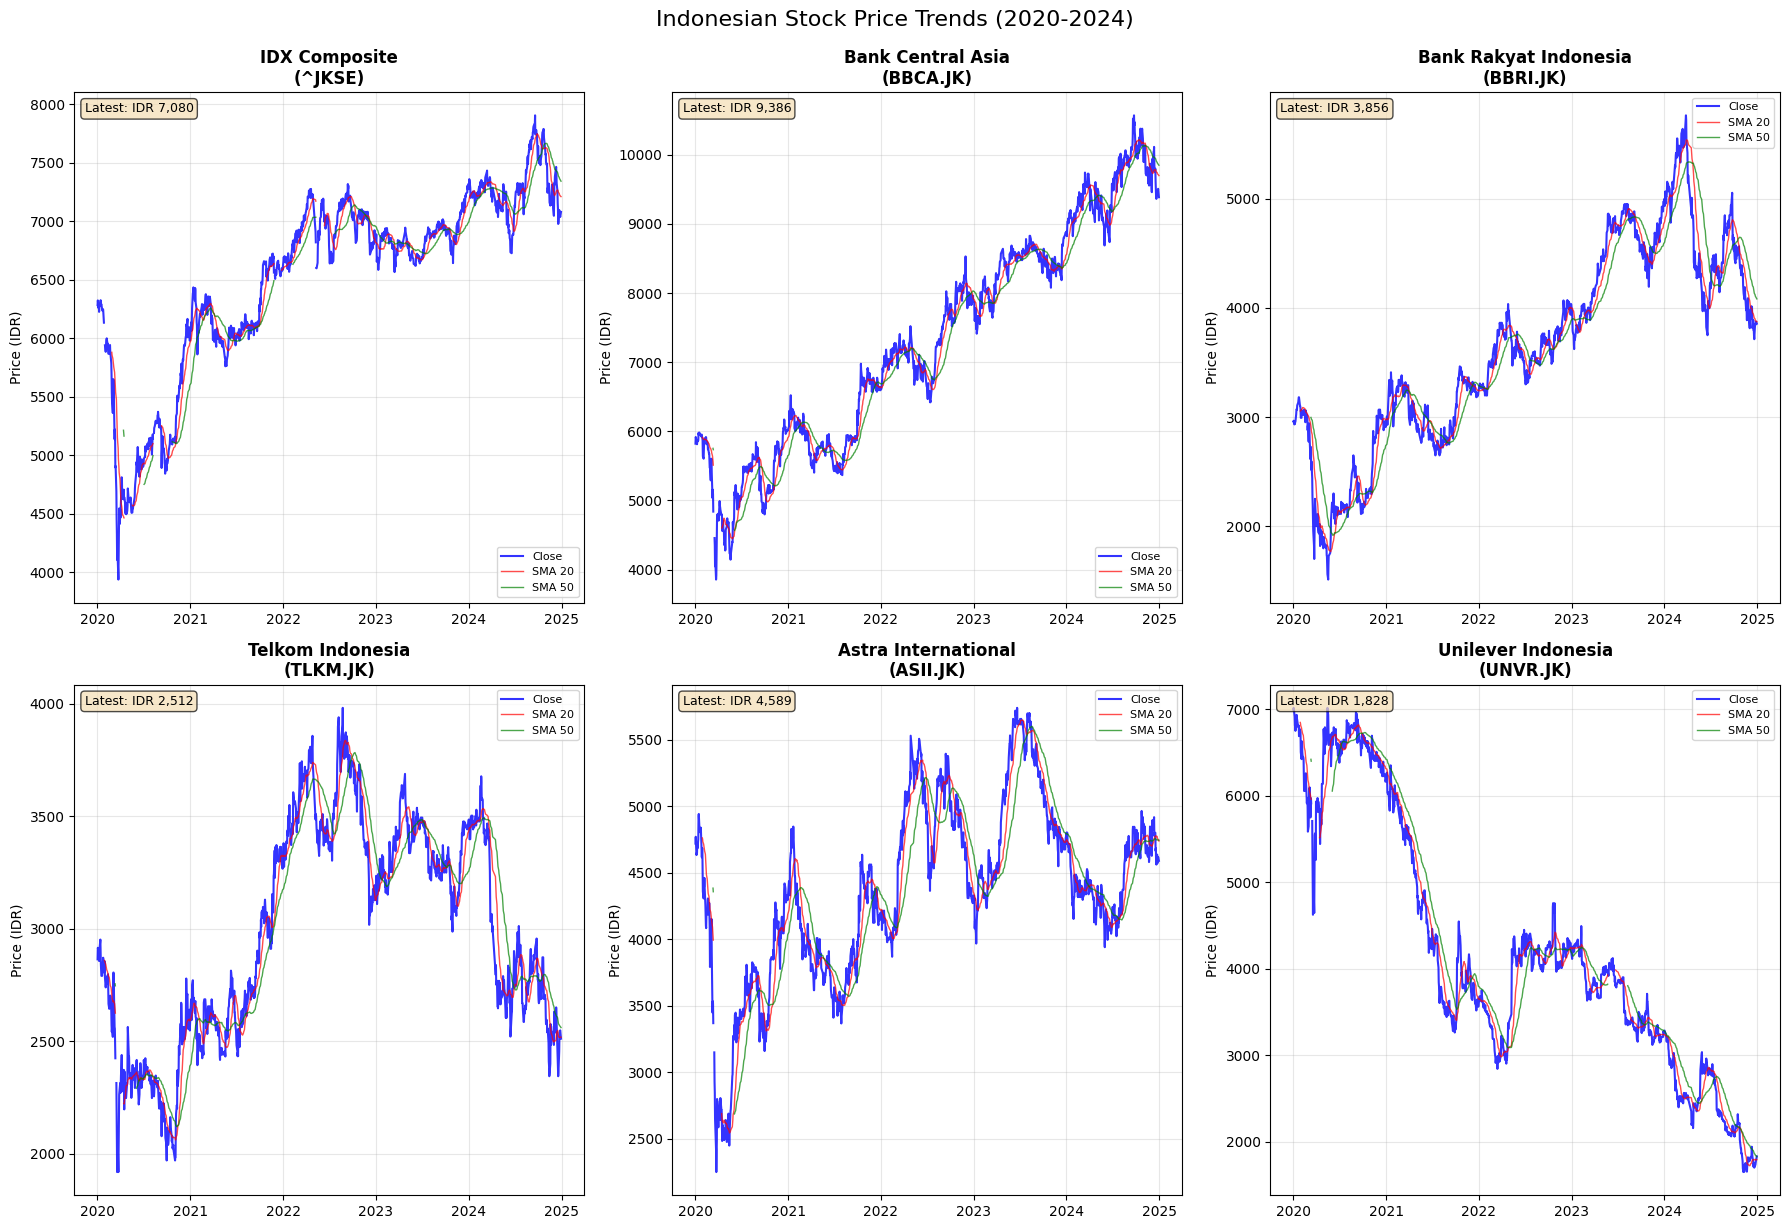

In [12]:
plot_price_trends(processed_data)

# EDA - Returns Distribution

In [13]:
def plot_returns_analysis(processed_data):
    """Analyze returns distribution - FIXED VERSION"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # FIX: Handle MultiIndex untuk returns
    all_returns_list = []
    for symbol, data in processed_data.items():
        if isinstance(data.columns, pd.MultiIndex):
            returns_col = [col for col in data.columns if 'Returns' in str(col) and col[1] == ''][0]
            returns_data = data[returns_col].dropna()
        else:
            returns_data = data['Returns'].dropna()
        all_returns_list.append(returns_data)
    
    all_returns = pd.concat(all_returns_list)
    
    # 1. Returns distribution
    axes[0,0].hist(all_returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(all_returns.mean(), color='red', linestyle='--', label=f'Mean: {all_returns.mean():.4f}')
    axes[0,0].set_title('Daily Returns Distribution')
    axes[0,0].set_xlabel('Daily Returns')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    
    # 2. Volatility over time
    ihsg_data = processed_data['^JKSE']
    if isinstance(ihsg_data.columns, pd.MultiIndex):
        vol_col = [col for col in ihsg_data.columns if 'Volatility' in str(col)][0]
        volatility_data = ihsg_data[vol_col]
    else:
        volatility_data = ihsg_data['Volatility']
        
    axes[0,1].plot(ihsg_data.index, volatility_data, label='IHSG Volatility', color='orange')
    axes[0,1].set_title('Market Volatility Over Time')
    axes[0,1].set_ylabel('20-Day Rolling Volatility')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()
    
    # 3. Volume vs Price Change
    bbca_data = processed_data['BBCA.JK']
    if isinstance(bbca_data.columns, pd.MultiIndex):
        vol_col = [col for col in bbca_data.columns if 'Volume' in str(col) and 'BBCA' in str(col)][0]
        price_change_col = [col for col in bbca_data.columns if 'Price_Change' in str(col)][0]
        volume_data = bbca_data[vol_col]
        price_change_data = bbca_data[price_change_col]
    else:
        volume_data = bbca_data['Volume']
        price_change_data = bbca_data['Price_Change']
    
    axes[1,0].scatter(volume_data, price_change_data, alpha=0.5, s=10, color='green')
    axes[1,0].set_title('Volume vs Price Change (BBCA)')
    axes[1,0].set_xlabel('Volume')
    axes[1,0].set_ylabel('Price Change (IDR)')
    
    # 4. FIX: Correlation heatmap dengan MultiIndex handling
    close_prices_dict = {}
    for symbol, data in processed_data.items():
        if isinstance(data.columns, pd.MultiIndex):
            close_col = [col for col in data.columns if 'Close' in str(col)][0]
            close_data = data[close_col]
        else:
            close_data = data['Close']
        
        close_prices_dict[STOCKS[symbol]] = close_data
    
    close_prices = pd.DataFrame(close_prices_dict)
    correlation_matrix = close_prices.corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, ax=axes[1,1])
    axes[1,1].set_title('Stock Price Correlations')
    
    plt.tight_layout()
    
    # FIX: Save SEBELUM plt.show()
    save_path = os.path.join(FIGURES_PATH, 'returns_analysis.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Returns analysis saved to: {save_path}")
    
    plt.show()

✅ Returns analysis saved to: ../reports/figures\returns_analysis.png


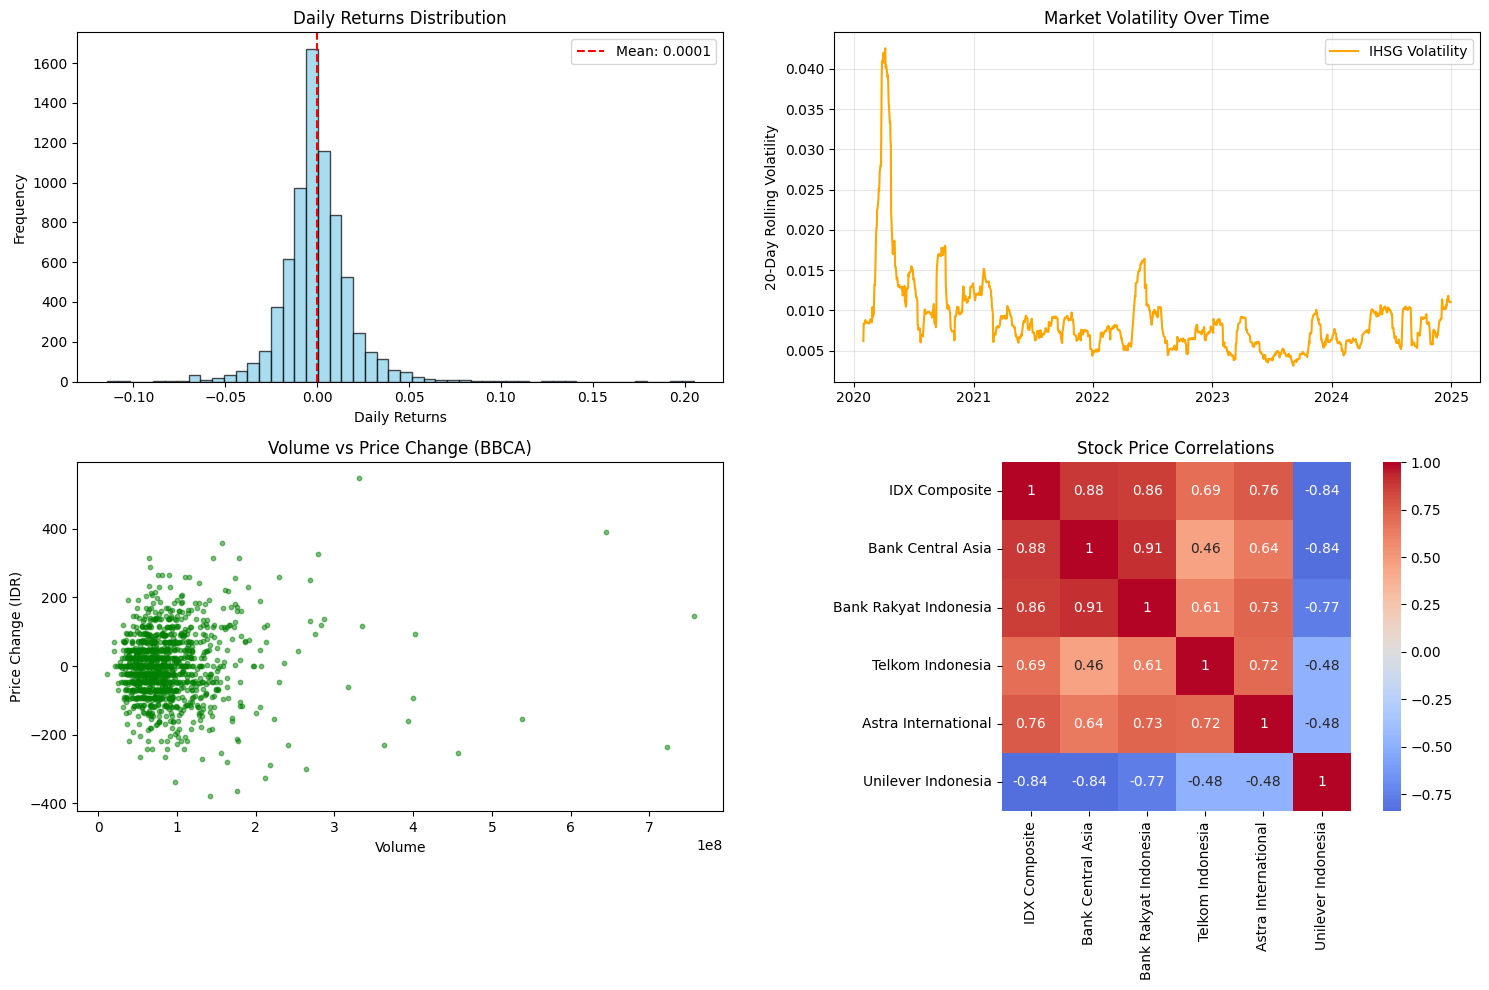

In [14]:
plot_returns_analysis(processed_data)

# Key Statistics Summary

In [15]:
def generate_summary_stats(processed_data):
    """Generate comprehensive summary statistics"""
    
    stats_summary = []
    
    for symbol, data in processed_data.items():
        # Calculate key metrics
        returns = data['Returns'].dropna()
        
        # Extract scalar values properly
        close_mean = data['Close'].mean()
        if hasattr(close_mean, 'iloc'):
            close_mean = close_mean.iloc[0]
            
        close_std = data['Close'].std()
        if hasattr(close_std, 'iloc'):
            close_std = close_std.iloc[0]
            
        volume_mean = data['Volume'].mean()
        if hasattr(volume_mean, 'iloc'):
            volume_mean = volume_mean.iloc[0]
            
        returns_mean = returns.mean()
        if hasattr(returns_mean, 'iloc'):
            returns_mean = returns_mean.iloc[0]
            
        returns_std = returns.std()
        if hasattr(returns_std, 'iloc'):
            returns_std = returns_std.iloc[0]
            
        returns_max = returns.max()
        if hasattr(returns_max, 'iloc'):
            returns_max = returns_max.iloc[0]
            
        returns_min = returns.min()
        if hasattr(returns_min, 'iloc'):
            returns_min = returns_min.iloc[0]
        
        stats = {
            'Stock': STOCKS[symbol],
            'Symbol': symbol,
            'Total_Days': len(data),
            'Avg_Price_IDR': f"{close_mean:,.0f}",
            'Price_Volatility': f"{close_std:,.0f}",
            'Daily_Return_Mean': f"{returns_mean:.4f}",
            'Daily_Return_Std': f"{returns_std:.4f}",
            'Max_Daily_Gain': f"{returns_max:.2%}",
            'Max_Daily_Loss': f"{returns_min:.2%}",
            'Sharpe_Ratio': f"{(returns_mean / returns_std * np.sqrt(252)):.2f}",
            'Avg_Volume': f"{volume_mean:,.0f}"
        }
        stats_summary.append(stats)
    
    summary_df = pd.DataFrame(stats_summary)
    
    print("=" * 80)
    print("                    SUMMARY STATISTICS")
    print("=" * 80)
    print(summary_df.to_string(index=False))
    
    return summary_df

In [16]:
summary_stats = generate_summary_stats(processed_data)

                    SUMMARY STATISTICS
                Stock  Symbol  Total_Days Avg_Price_IDR Price_Volatility Daily_Return_Mean Daily_Return_Std Max_Daily_Gain Max_Daily_Loss Sharpe_Ratio  Avg_Volume
        IDX Composite   ^JKSE        1211         6,521              785            0.0002           0.0102         10.19%         -6.58%         0.23 162,972,447
    Bank Central Asia BBCA.JK        1211         7,303            1,599            0.0005           0.0162         17.33%         -7.91%         0.51  88,031,679
Bank Rakyat Indonesia BBRI.JK        1211         3,629              894            0.0004           0.0211         20.49%         -7.67%         0.33 184,215,141
     Telkom Indonesia TLKM.JK        1211         2,985              477            0.0001           0.0190         13.74%         -6.96%         0.06 117,037,257
  Astra International ASII.JK        1211         4,368              667            0.0002           0.0206         12.71%        -11.45%         

# Save All Results

Menyiapkan folder tujuan...

Menyimpan file-file CSV...
  -> CSV berhasil disimpan di '../data/processed' dan '../reports'.

Menyimpan gambar-gambar plot...
✅ Price trends saved to: ../reports/figures\price_trends.png


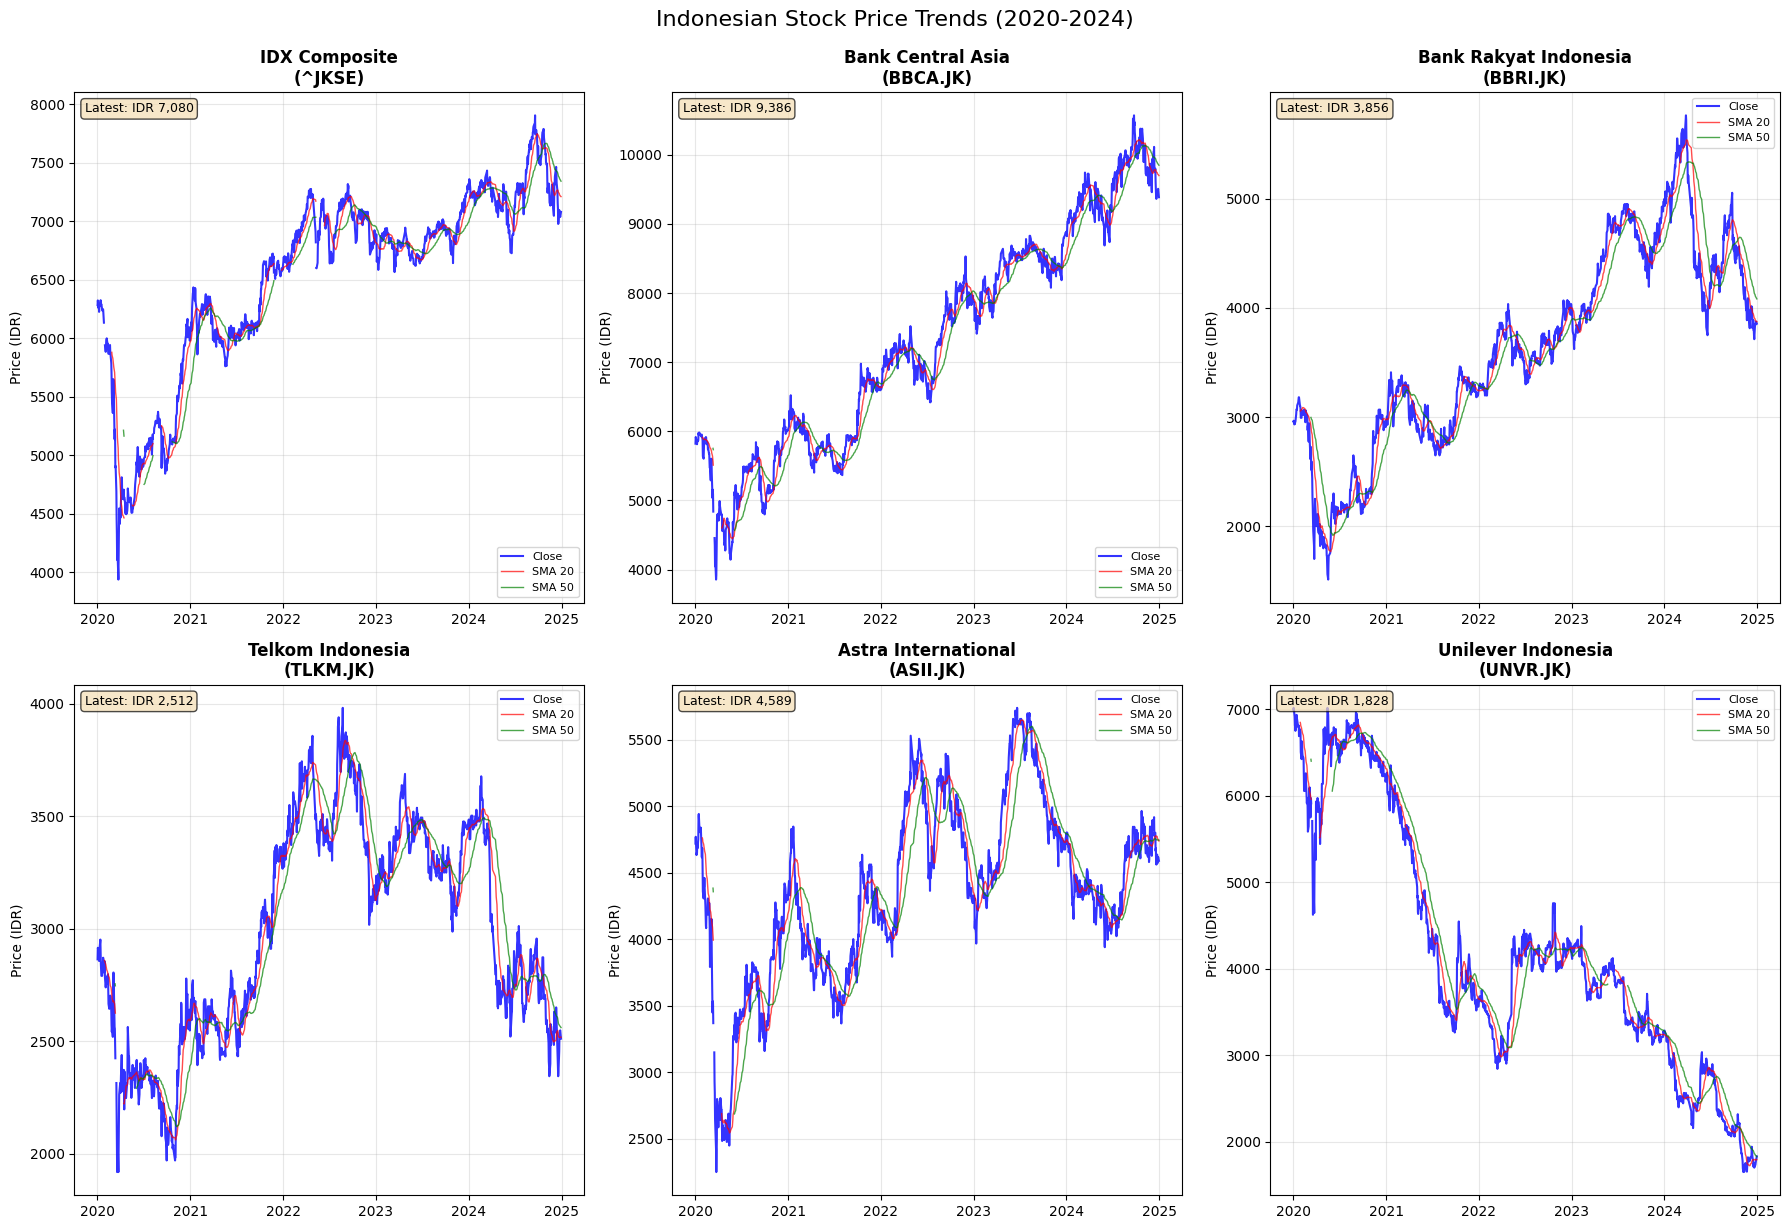

✅ Returns analysis saved to: ../reports/figures\returns_analysis.png


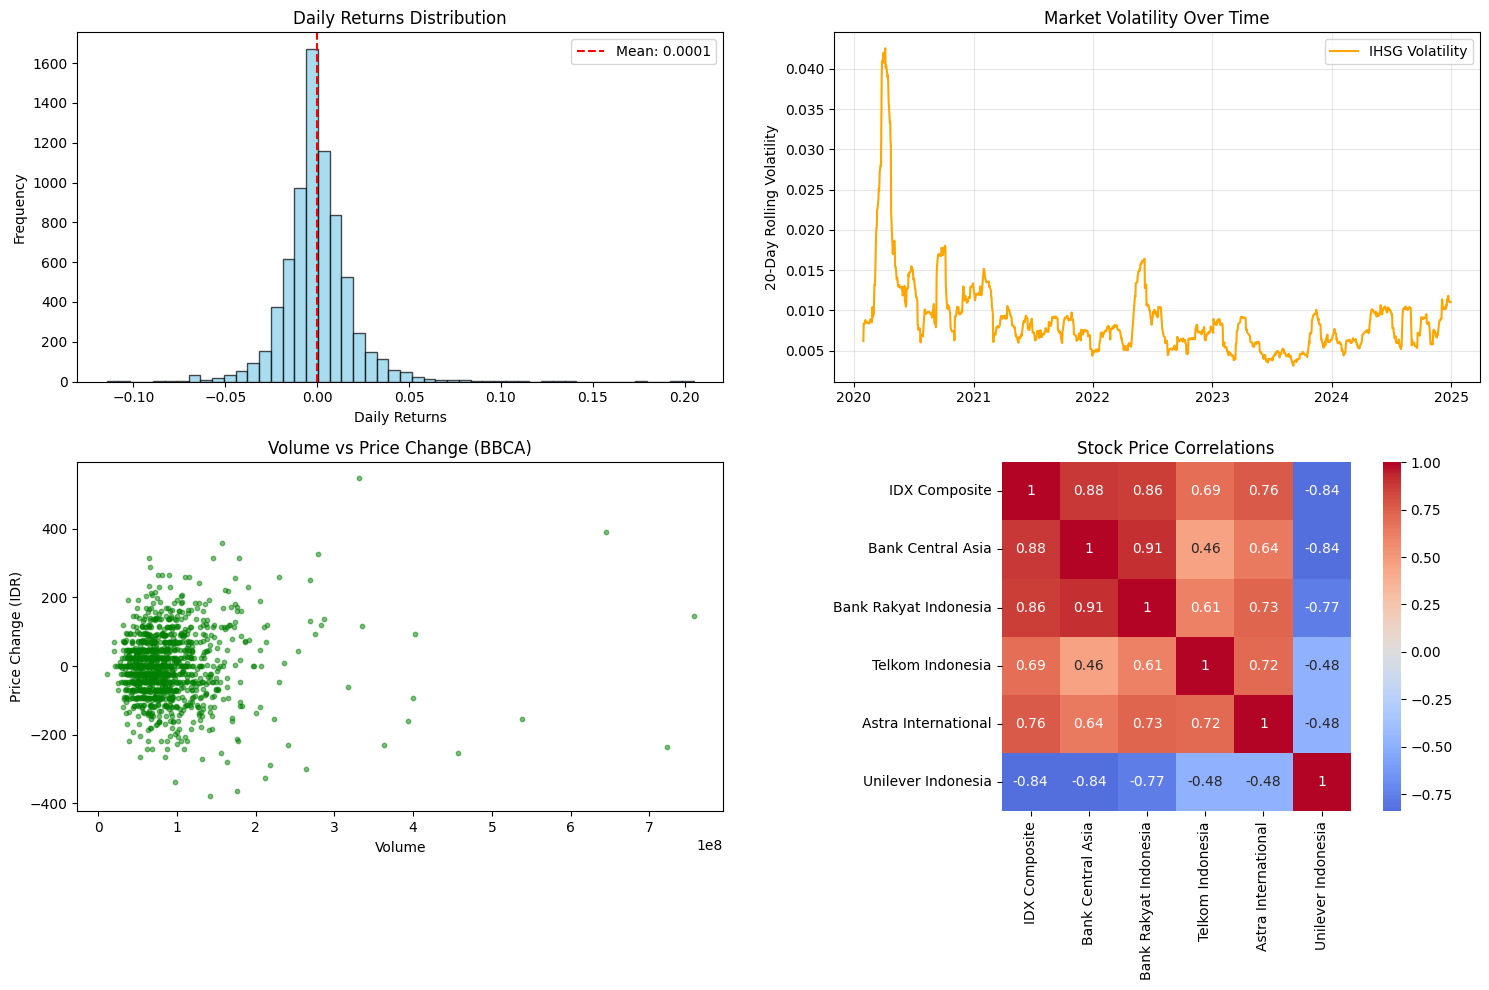

✅ Figures properly saved in: ../reports/figures
✅ price_trends.png: 1,368,730 bytes
✅ returns_analysis.png: 708,814 bytes


In [17]:
import os
import matplotlib.pyplot as plt

# 1. SETUP PATH TUJUAN
print("Menyiapkan folder tujuan...")
DATA_PATH = '../data/processed'
REPORTS_PATH = '../reports'
FIGURES_PATH = '../reports/figures'

os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(FIGURES_PATH, exist_ok=True)

# 2. SIMPAN SEMUA FILE CSV
print("\nMenyimpan file-file CSV...")

# Menyimpan data saham
for symbol, data in processed_data.items():
    clean_symbol = symbol.replace('^', '').replace('.JK', '')
    file_path = os.path.join(DATA_PATH, f'{clean_symbol}_processed.csv')
    data.to_csv(file_path)

# Menyimpan ringkasan statistik
summary_path = os.path.join(REPORTS_PATH, 'summary_statistics.csv')
summary_stats.to_csv(summary_path, index=False)
print(f"  -> CSV berhasil disimpan di '{DATA_PATH}' dan '{REPORTS_PATH}'.")

# 3. SIMPAN SEMUA PLOT/GAMBAR

print("\nMenyimpan gambar-gambar plot...")

plot_price_trends(processed_data)
plot_returns_analysis(processed_data)

print(f"✅ Figures properly saved in: {FIGURES_PATH}")

# Verify files
for filename in ['price_trends.png', 'returns_analysis.png']:
    filepath = os.path.join(FIGURES_PATH, filename)
    if os.path.exists(filepath):
        size = os.path.getsize(filepath)
        print(f"✅ {filename}: {size:,} bytes")
    else:
        print(f"❌ {filename}: NOT FOUND")

# Quick Model Preview (testing)

In [18]:
def simple_baseline_model(symbol):
    """Ultra-simple baseline model"""
    
    try:
        data = processed_data[symbol]
        stock_name = STOCKS[symbol]
        
        print(f"\nProcessing {stock_name}...")
        
        # Handle MultiIndex columns if present
        if isinstance(data.columns, pd.MultiIndex):
            close_cols = [col for col in data.columns if 'Close' in str(col)]
            if not close_cols:
                print(f"   ❌ No Close column found in MultiIndex")
                return None
            close_prices = data[close_cols[0]].dropna()
        else:
            if 'Close' not in data.columns:
                print(f"   ❌ No Close column found")
                return None
            close_prices = data['Close'].dropna()
        
        # Convert to numpy array to avoid pandas issues
        prices = close_prices.values
        
        if len(prices) < 21:
            print(f"   ❌ Insufficient data: {len(prices)} days")
            return None
        
        print(f"   ✅ Data points: {len(prices)}")
        print(f"   ✅ Price range: {prices.min():.0f} - {prices.max():.0f}")
        
        # Simple moving average baseline
        predictions = []
        actuals = []
        
        # Start from day 21 (need 20 days for SMA)
        for i in range(20, len(prices)):
            # Use previous 20 days average to predict current day
            sma_prediction = np.mean(prices[i-20:i])
            actual_price = prices[i]
            
            predictions.append(sma_prediction)
            actuals.append(actual_price)
        
        predictions = np.array(predictions)
        actuals = np.array(actuals)
        
        # Calculate metrics
        mse = np.mean((actuals - predictions) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(actuals - predictions))
        
        avg_price = np.mean(actuals)
        rmse_percentage = (rmse / avg_price) * 100
        
        print(f"   📊 RMSE: {rmse:.2f}")
        print(f"   📊 MAE: {mae:.2f}")
        print(f"   📊 Avg Price: {avg_price:.2f}")
        print(f"   📊 RMSE %: {rmse_percentage:.2f}%")
        
        return {
            'Stock': stock_name,
            'Symbol': symbol,
            'RMSE': rmse,
            'MAE': mae,
            'Avg_Price': avg_price,
            'RMSE_Percentage': rmse_percentage,
            'Data_Points': len(actuals)
        }
        
    except Exception as e:
        print(f"   ❌ Error processing {symbol}: {str(e)}")
        return None

# Run simple baseline for all stocks
results = []
for symbol in processed_data.keys():
    result = simple_baseline_model(symbol)
    if result:
        results.append(result)

# Create summary
if results:
    print(f"\n🎉 BASELINE MODEL SUMMARY")
    print("="*60)
    
    results_df = pd.DataFrame(results)
    results_df = results_df.round(2)
    
    # Sort by RMSE percentage (best first)
    results_df_sorted = results_df.sort_values('RMSE_Percentage')
    
    # Display key columns
    display_cols = ['Stock', 'RMSE', 'MAE', 'RMSE_Percentage', 'Data_Points']
    print(results_df_sorted[display_cols].to_string(index=False))
    
    # Save results
    output_file = os.path.join(REPORTS_PATH, 'baseline_results_final.csv')
    results_df.to_csv(output_file, index=False)
    print(f"\n💾 Results saved to: {output_file}")
    
    # Show best and worst performers
    best_stock = results_df_sorted.iloc[0]
    worst_stock = results_df_sorted.iloc[-1]
    
    print(f"\n🏆 Best Performer: {best_stock['Stock']} (RMSE: {best_stock['RMSE_Percentage']:.2f}%)")
    print(f"📉 Worst Performer: {worst_stock['Stock']} (RMSE: {worst_stock['RMSE_Percentage']:.2f}%)")
    
else:
    print("❌ No successful results obtained")


Processing IDX Composite...
   ✅ Data points: 1205
   ✅ Price range: 3938 - 7905
   📊 RMSE: 171.46
   📊 MAE: 120.35
   📊 Avg Price: 6525.24
   📊 RMSE %: 2.63%

Processing Bank Central Asia...
   ✅ Data points: 1209
   ✅ Price range: 3855 - 10570
   📊 RMSE: 234.44
   📊 MAE: 176.49
   📊 Avg Price: 7326.91
   📊 RMSE %: 3.20%

Processing Bank Rakyat Indonesia...
   ✅ Data points: 1211
   ✅ Price range: 1514 - 5763
   📊 RMSE: 178.25
   📊 MAE: 134.27
   📊 Avg Price: 3638.18
   📊 RMSE %: 4.90%

Processing Telkom Indonesia...
   ✅ Data points: 1210
   ✅ Price range: 1919 - 3982
   📊 RMSE: 123.13
   📊 MAE: 91.15
   📊 Avg Price: 2986.96
   📊 RMSE %: 4.12%

Processing Astra International...
   ✅ Data points: 1210
   ✅ Price range: 2251 - 5739
   📊 RMSE: 220.76
   📊 MAE: 163.33
   📊 Avg Price: 4360.97
   📊 RMSE %: 5.06%

Processing Unilever Indonesia...
   ✅ Data points: 1209
   ✅ Price range: 1647 - 7015
   📊 RMSE: 227.29
   📊 MAE: 162.26
   📊 Avg Price: 4149.52
   📊 RMSE %: 5.48%

🎉 BASELINE MO